# Revised Notebook- PCA and Harker Diagrams of Chixculub Tektites 

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns
from pyrolite.util.classification import TAS
from pyrolite.util.synthetic import normal_frame, random_cov_matrix
import pyrolite.plot
from pyrolite.plot import pyroplot
import sklearn

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

/Users/paolotheultimate/anaconda3/lib/python3.7/site-packages/numpydoc/docscrape.py:434: UserWarning: potentially wrong underline length... 
Note 
----- in 
Plots spidergrams for trace elements data. Additional arguments are typically forwarded
to respective :mod:`matplotlib` functions :func:`~matplotlib.pyplot.plot` and... in the docstring of spider in /Users/paolotheultimate/anaconda3/lib/python3.7/site-packages/pyrolite/plot/spider.py.
  warn(msg)
/Users/paolotheultimate/anaconda3/lib/python3.7/site-packages/numpydoc/docscrape.py:434: UserWarning: potentially wrong underline length... 
Parameters 
----------- in 
Method for plotting histograms (mode='hist2d'|'hexbin') or kernel density
esitimates from point data. Convenience access function to... in the docstring of density in /Users/paolotheultimate/anaconda3/lib/python3.7/site-packages/pyrolite/plot/__init__.py.
  warn(msg)
/Users/paolotheultimate/anaconda3/lib/python3.7/site-packages/numpydoc/docscrape.py:434: UserWarning: potent

In [2]:
geochem_data = pd.read_csv('../data/geochem_data.csv', header=0)
geochem_data['sample_no'] = [i[1] for i in geochem_data['Sample'].str.split('_')]
geochem_data.head()

,Sample,Point No.,Line,K2O,CaO,TiO2,SiO2,Al2O3,Na2O,MgO,FeO,MnO,Cl,SO3,P2O5,Total,sample_no
0,D1_sph1,1,3837 G,0.86,21.26,0.62,51.57,13.85,2.46,4.29,4.55,0.16,0.01,0.02,NaN,99.65,sph1
1,D1_sph1,2,3838 G,0.61,24.94,0.60,48.62,12.88,1.80,4.52,4.86,0.12,0.00,0.25,NaN,99.21,sph1
2,D1_sph1,3,3839 G,1.34,17.58,0.63,54.09,13.99,3.07,3.66,4.34,0.13,0.00,0.05,NaN,98.85,sph1
3,D1_sph1,4,3840 G,0.91,19.85,0.65,52.31,13.84,2.59,3.99,4.90,0.13,0.00,0.16,NaN,99.34,sph1
4,D1_sph1,5,3841 G,0.89,21.10,0.64,50.91,13.55,2.30,4.34,4.48,0.11,0.00,0.07,NaN,98.39,sph1


In [3]:
geochem_data_sample_mean = geochem_data.groupby(by='Sample').mean().drop(['Point No.', 'Total'], axis=1)
geochem_data_sample_mean.head()

,K2O,CaO,TiO2,SiO2,Al2O3,Na2O,MgO,FeO,MnO,Cl,SO3,P2O5
Sample,,,,,,,,,,,,
D1_sph1,0.863333,21.408333,0.633333,51.113333,13.550000,2.366667,4.256667,4.623333,0.130000,0.001667,0.111667,NaN
D1_sph10,1.010000,12.491667,0.690000,56.916667,15.401667,2.348333,4.373333,6.414333,0.183500,0.001667,0.039500,0.080000
D1_sph11,1.005000,16.403333,0.620000,56.098333,14.400000,2.210000,4.221667,4.879000,0.138167,0.001333,0.044667,0.096000
D1_sph12,1.256667,9.848333,0.635000,61.396667,15.321667,2.790000,3.355000,5.513333,0.146667,0.001667,0.020000,NaN
D1_sph14,1.022500,14.613750,0.658750,56.563750,15.348750,2.238750,4.196250,5.519625,0.150000,0.002375,0.186250,0.161667


In [4]:
geochem_data_sample_mean.columns

Index(['K2O', 'CaO', 'TiO2', 'SiO2', 'Al2O3', 'Na2O', 'MgO', 'FeO', 'MnO',
       'Cl', 'SO3', 'P2O5'],
      dtype='object')

In [5]:
features = ['K2O', 'CaO', 'TiO2', 'Al2O3', 'Na2O', 'MgO', 'FeO', 'MnO']

## try PCA

In [6]:
x = geochem_data[features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# perform PCA analysis
pca = decomposition.PCA(n_components=5)

pca.fit(x)
x_pca = pca.transform(x)


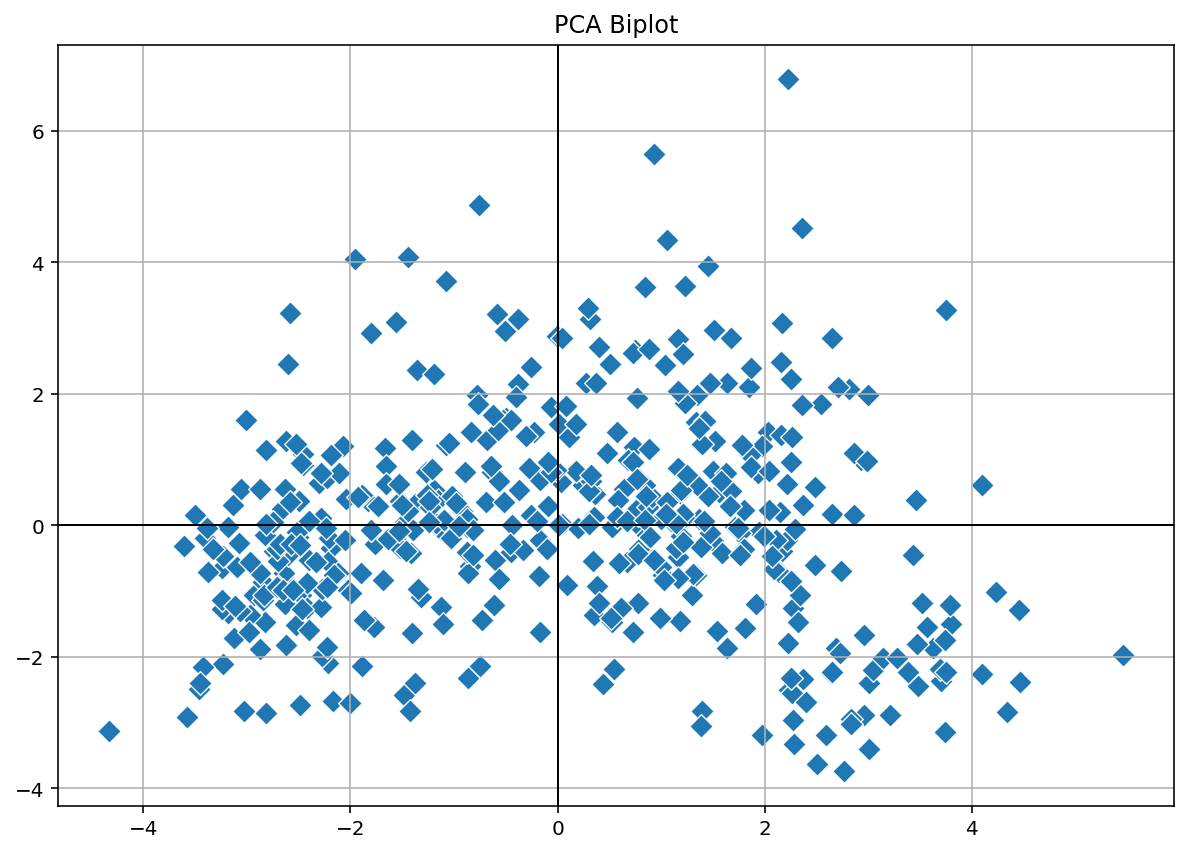

In [7]:
# plot figure
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], s=70)
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
plt.title('PCA Biplot')
plt.show()

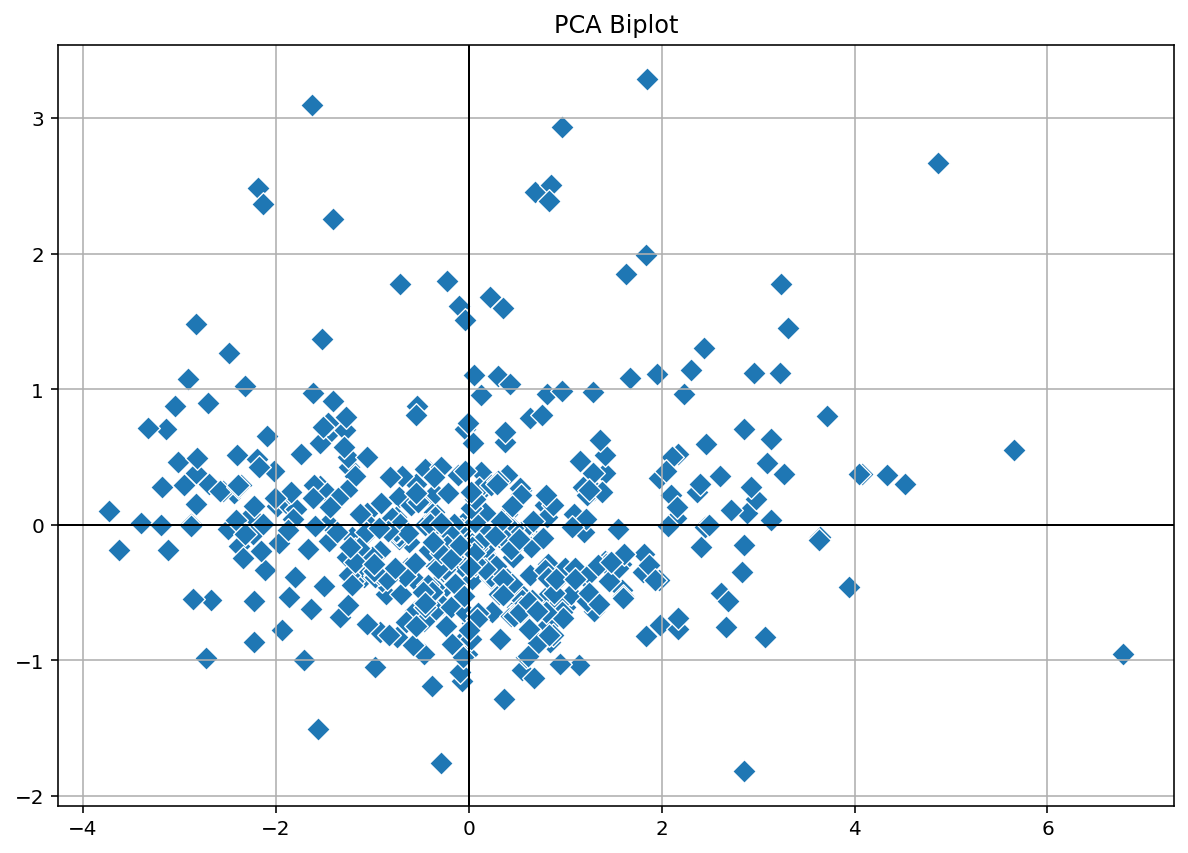

In [8]:
# plot figure
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 1], y=x_pca[:, 2], s=70)
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
plt.title('PCA Biplot')
plt.show()

In [9]:
pca_fractions = pca.components_.T*3

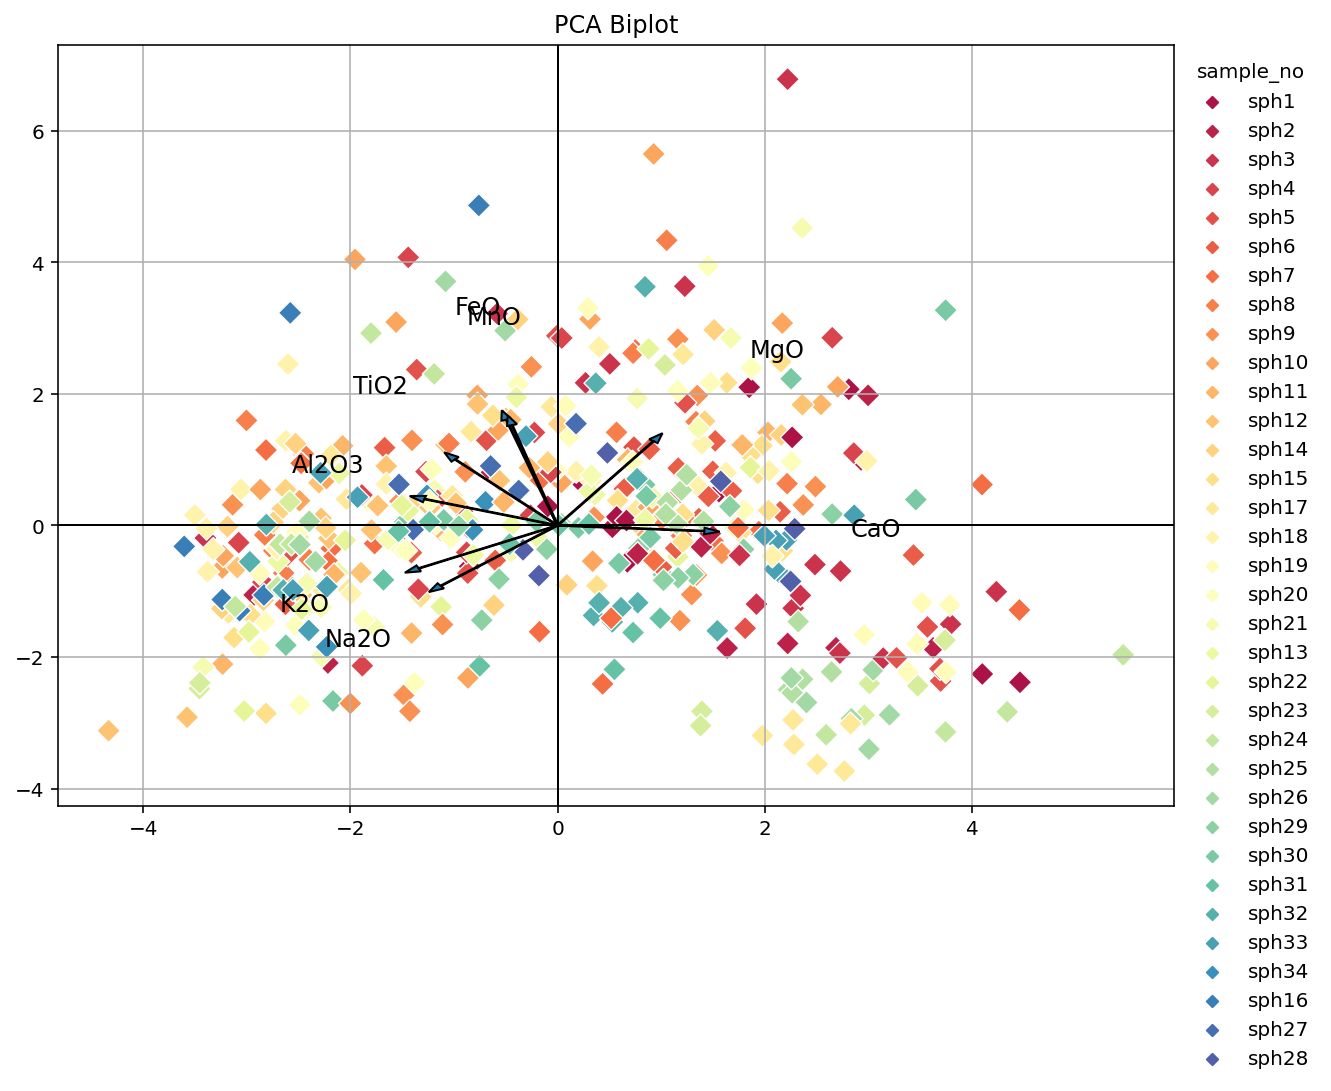

In [10]:
#first and second components:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], s=70, hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][0], pca_fractions[i][1], width=0.01, head_width=0.1)
    plt.annotate(features[i], xy=(pca_fractions[i][0]*2, 
                                      pca_fractions[i][1]*2), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
# plt.gca().invert_yaxis()
plt.title('PCA Biplot')
plt.show()

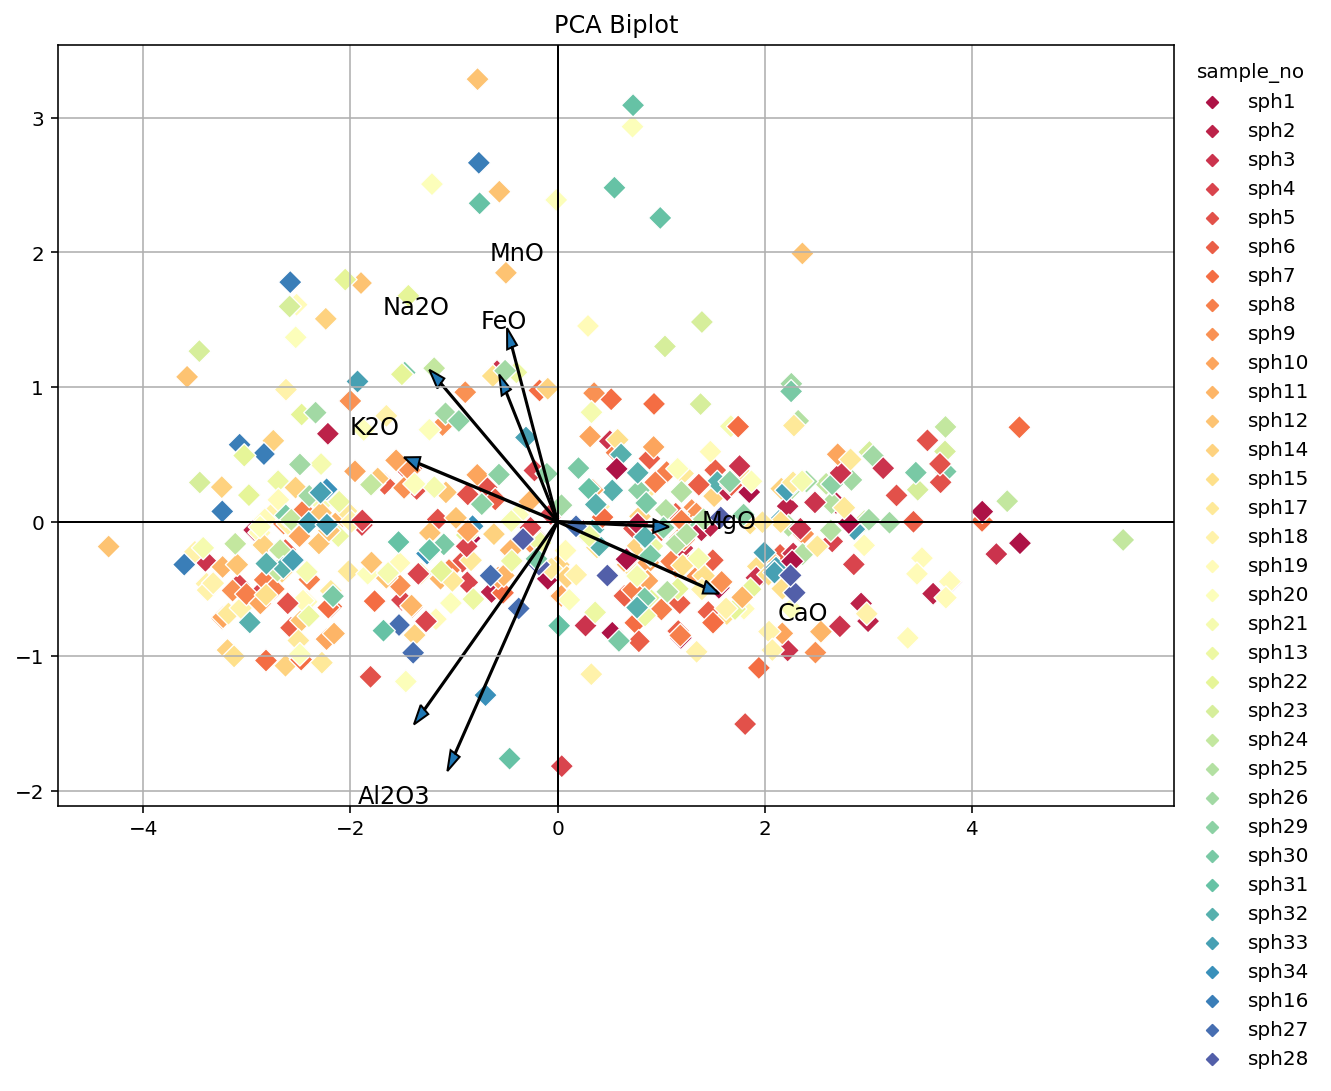

In [11]:
#First and third components:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 2], s=70, hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][0], pca_fractions[i][2], width=0.01, head_width=0.1)
    plt.annotate(features[i], xy=(pca_fractions[i][0]*1.5, 
                                      pca_fractions[i][2]*1.5), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
# plt.gca().invert_yaxis()
plt.title('PCA Biplot')
plt.show()

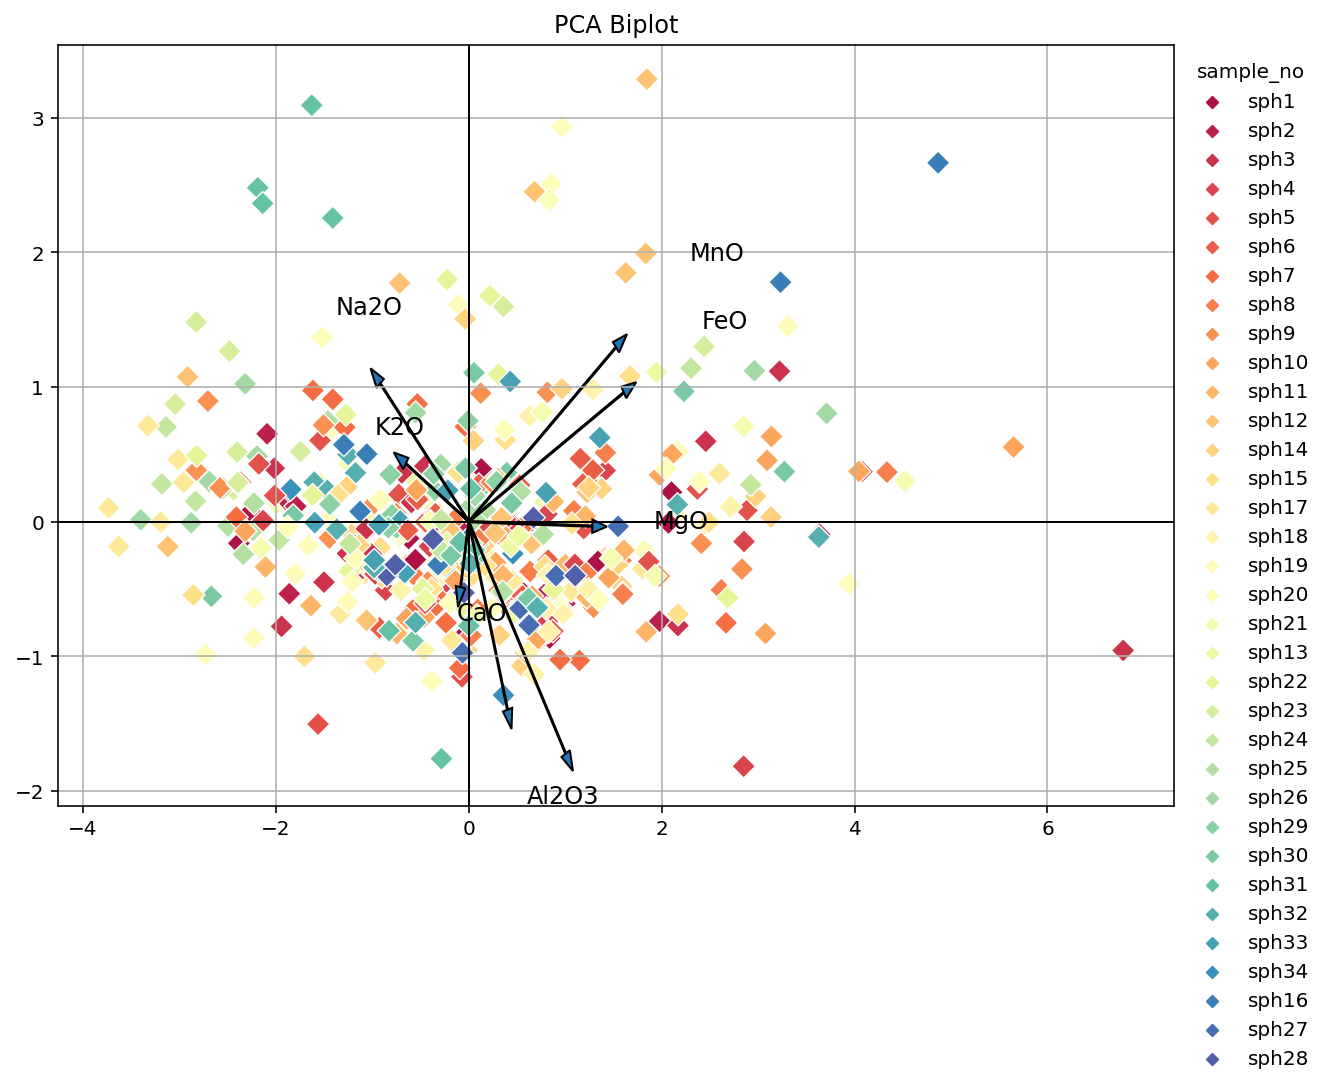

In [12]:
#second and third components
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 1], y=x_pca[:, 2], s=70, hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][1], pca_fractions[i][2], width=0.01, head_width=0.1)
    plt.annotate(features[i], xy=(pca_fractions[i][1]*1.5, 
                                      pca_fractions[i][2]*1.5), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
# plt.gca().invert_yaxis()
plt.title('PCA Biplot')
plt.show()

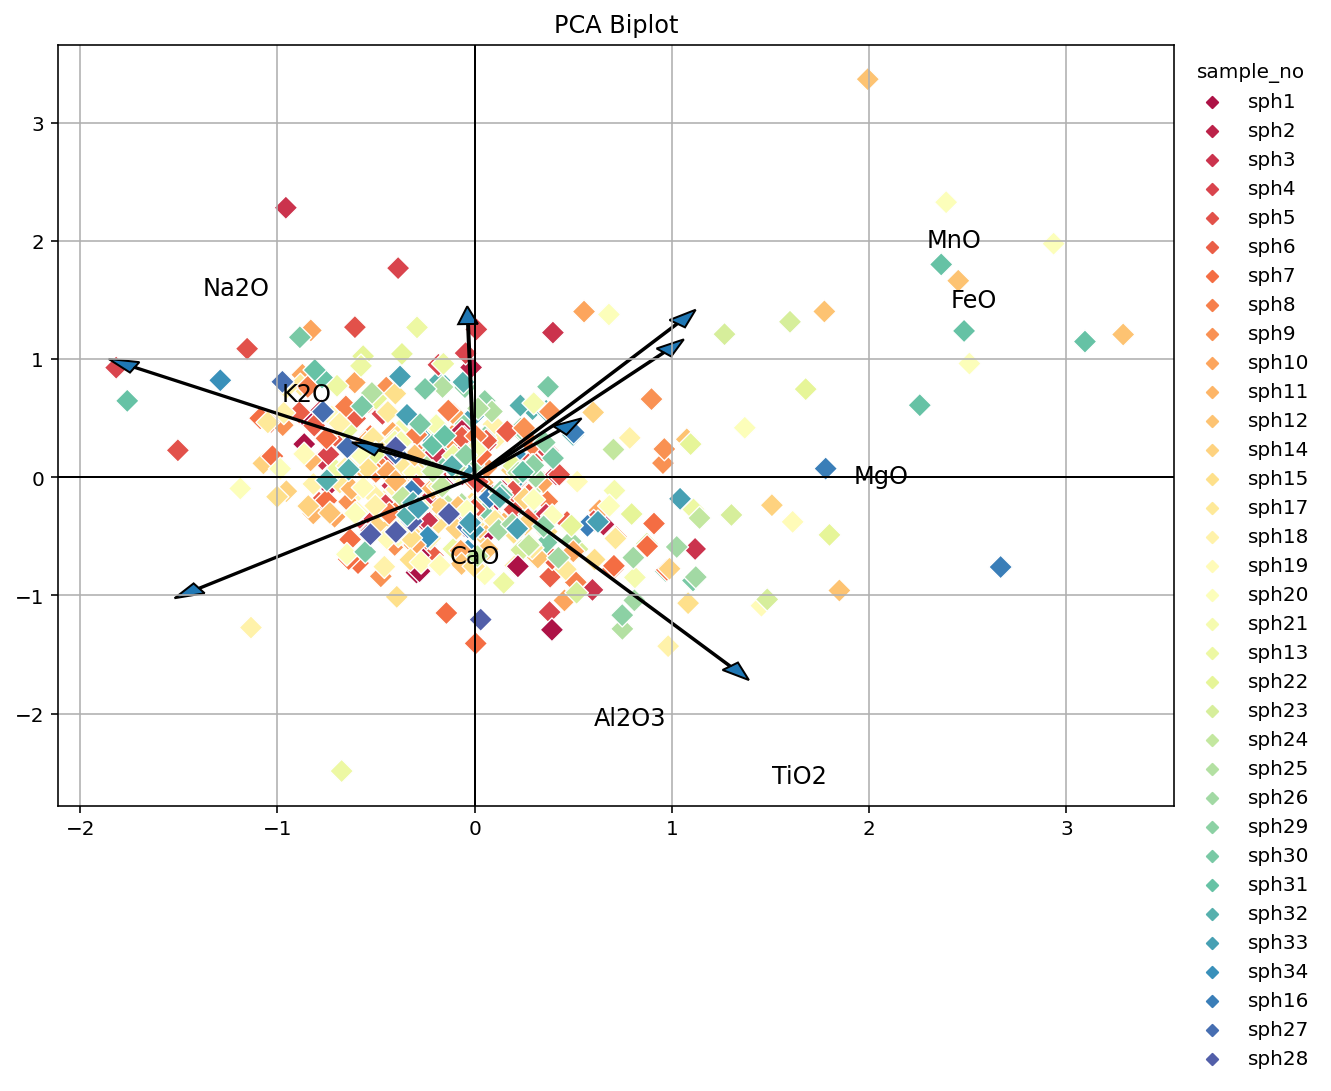

In [13]:
#Third and fourth components:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 2], y=x_pca[:, 3], s=70, hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][2], pca_fractions[i][3], width=0.01, head_width=0.1)
    plt.annotate(features[i], xy=(pca_fractions[i][1]*1.5, 
                                      pca_fractions[i][2]*1.5), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
# plt.gca().invert_yaxis()
plt.title('PCA Biplot')
plt.show()

# Gorgonilla vs previous studies

In [14]:
fin_data = pd.read_csv('../data/geochem_data.csv', header=0)
fin_data['sample_no'] = [i[1] for i in fin_data['Sample'].str.split('_')]
fin_data.head()

,Sample,Point No.,Line,K2O,CaO,TiO2,SiO2,Al2O3,Na2O,MgO,FeO,MnO,Cl,SO3,P2O5,Total,sample_no
0,D1_sph1,1,3837 G,0.86,21.26,0.62,51.57,13.85,2.46,4.29,4.55,0.16,0.01,0.02,NaN,99.65,sph1
1,D1_sph1,2,3838 G,0.61,24.94,0.60,48.62,12.88,1.80,4.52,4.86,0.12,0.00,0.25,NaN,99.21,sph1
2,D1_sph1,3,3839 G,1.34,17.58,0.63,54.09,13.99,3.07,3.66,4.34,0.13,0.00,0.05,NaN,98.85,sph1
3,D1_sph1,4,3840 G,0.91,19.85,0.65,52.31,13.84,2.59,3.99,4.90,0.13,0.00,0.16,NaN,99.34,sph1
4,D1_sph1,5,3841 G,0.89,21.10,0.64,50.91,13.55,2.30,4.34,4.48,0.11,0.00,0.07,NaN,98.39,sph1


In [15]:
fin_data_sample_mean = fin_data.groupby(by='Sample').mean().drop(['Point No.', 'Total'], axis=1)
fin_data_sample_mean.head()

,K2O,CaO,TiO2,SiO2,Al2O3,Na2O,MgO,FeO,MnO,Cl,SO3,P2O5
Sample,,,,,,,,,,,,
D1_sph1,0.863333,21.408333,0.633333,51.113333,13.550000,2.366667,4.256667,4.623333,0.130000,0.001667,0.111667,NaN
D1_sph10,1.010000,12.491667,0.690000,56.916667,15.401667,2.348333,4.373333,6.414333,0.183500,0.001667,0.039500,0.080000
D1_sph11,1.005000,16.403333,0.620000,56.098333,14.400000,2.210000,4.221667,4.879000,0.138167,0.001333,0.044667,0.096000
D1_sph12,1.256667,9.848333,0.635000,61.396667,15.321667,2.790000,3.355000,5.513333,0.146667,0.001667,0.020000,NaN
D1_sph14,1.022500,14.613750,0.658750,56.563750,15.348750,2.238750,4.196250,5.519625,0.150000,0.002375,0.186250,0.161667


In [16]:
bermudez = pd.read_csv('../data/Bermudez.csv', header=0)
belza=pd.read_csv('../data/Belza.csv', header=0)
izett=pd.read_csv('../data/izett.csv', header=0)
kbrl_blck=pd.read_csv('../data/koeberl_black.csv', header=0)
kbrl_ylw=pd.read_csv('../data/koeberl_yellow.csv', header=0)

# Harker diagrams

**Mean Data**

Harker diagrams, mean tektites in study


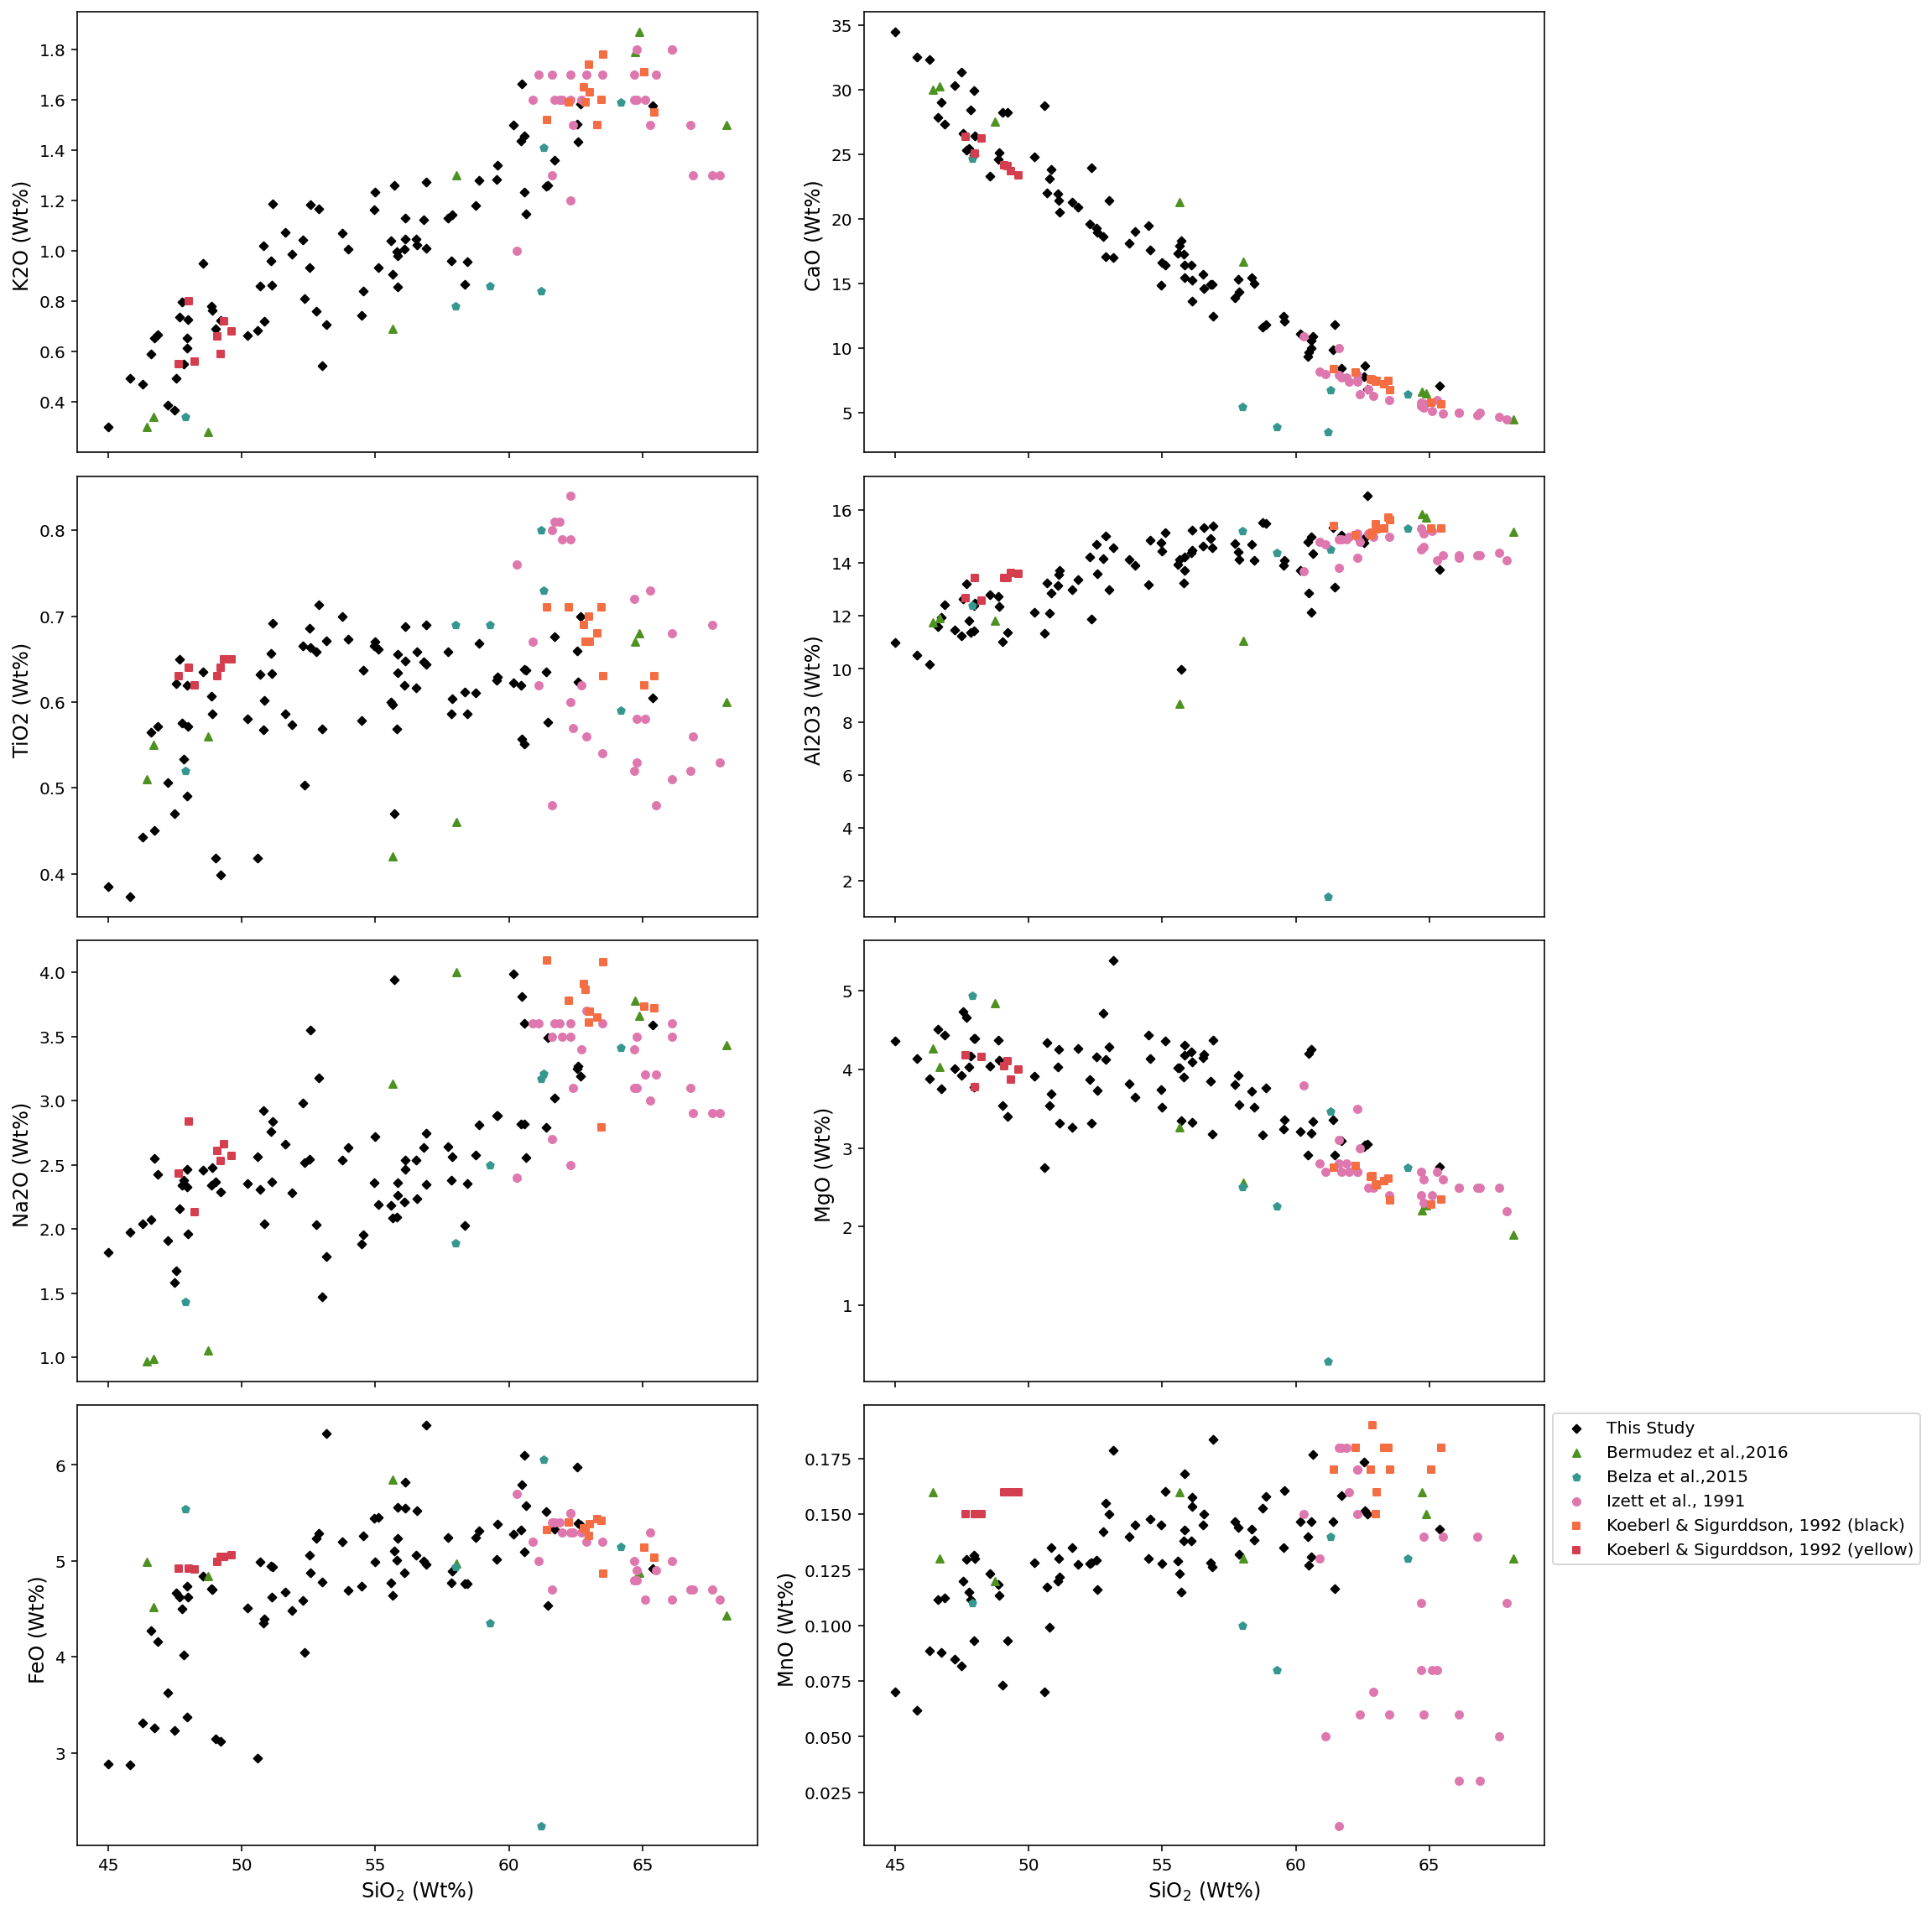

In [17]:
nrow = 4; ncol = 2;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, sharex=True, figsize=(13, 16))

i=0
for ax in axs.reshape(-1): 
    ax.scatter(fin_data_sample_mean['SiO2'].tolist(), fin_data_sample_mean[features[i]].tolist(),color = 'black', 
               s=12,label='This Study')
    ax.scatter(bermudez['SiO2'].tolist(), bermudez[features[i]].tolist(), marker= '^',s=20,color = '#4d9221',
               label='Bermudez et al.,2016')
    ax.scatter(belza['SiO2'].tolist(), belza[features[i]].tolist(), marker= 'p',s=20,color = '#35978f',
               label='Belza et al.,2015')
    ax.scatter(izett['SiO2'].tolist(), izett[features[i]].tolist(), marker= 'o',s=20,color = '#de77ae',
               label='Izett et al., 1991')
    ax.scatter(kbrl_blck['SiO2'].tolist(), kbrl_blck[features[i]].tolist(), marker= 's',s=20,color = '#f46d43',
               label='Koeberl & Sigurddson, 1992 (black)')
    ax.scatter(kbrl_ylw['SiO2'].tolist(), kbrl_ylw[features[i]].tolist(), marker= 's',s=20,color = '#d53e4f',
               label='Koeberl & Sigurddson, 1992 (yellow)')
    ax.set_ylabel(features[i]+ ' (Wt%) ')

    i = i + 1

print('Harker diagrams, mean tektites in study')
plt.setp(axs[-1, :], xlabel='SiO$_2$ (Wt%)')
plt.tight_layout()
plt.legend(frameon=True)
#plt.savefig('/Volumes/GoogleDrive/My Drive/Renne_Reading/Tektites/harker_oxides.pdf',dpi=300,
           # bbox_inches='tight')
plt.show()

In [18]:
fin_data.columns

Index(['Sample', 'Point No.', 'Line', 'K2O', 'CaO', 'TiO2', 'SiO2', 'Al2O3',
       'Na2O', 'MgO', 'FeO', 'MnO', 'Cl', 'SO3', 'P2O5', 'Total', 'sample_no'],
      dtype='object')

In [19]:
volatiles = ['SO3','P2O5','Cl']
volatiles_labels=['SO$_3$','P$_2$O$_5$','Cl']

Volatiles, mean tektites in study


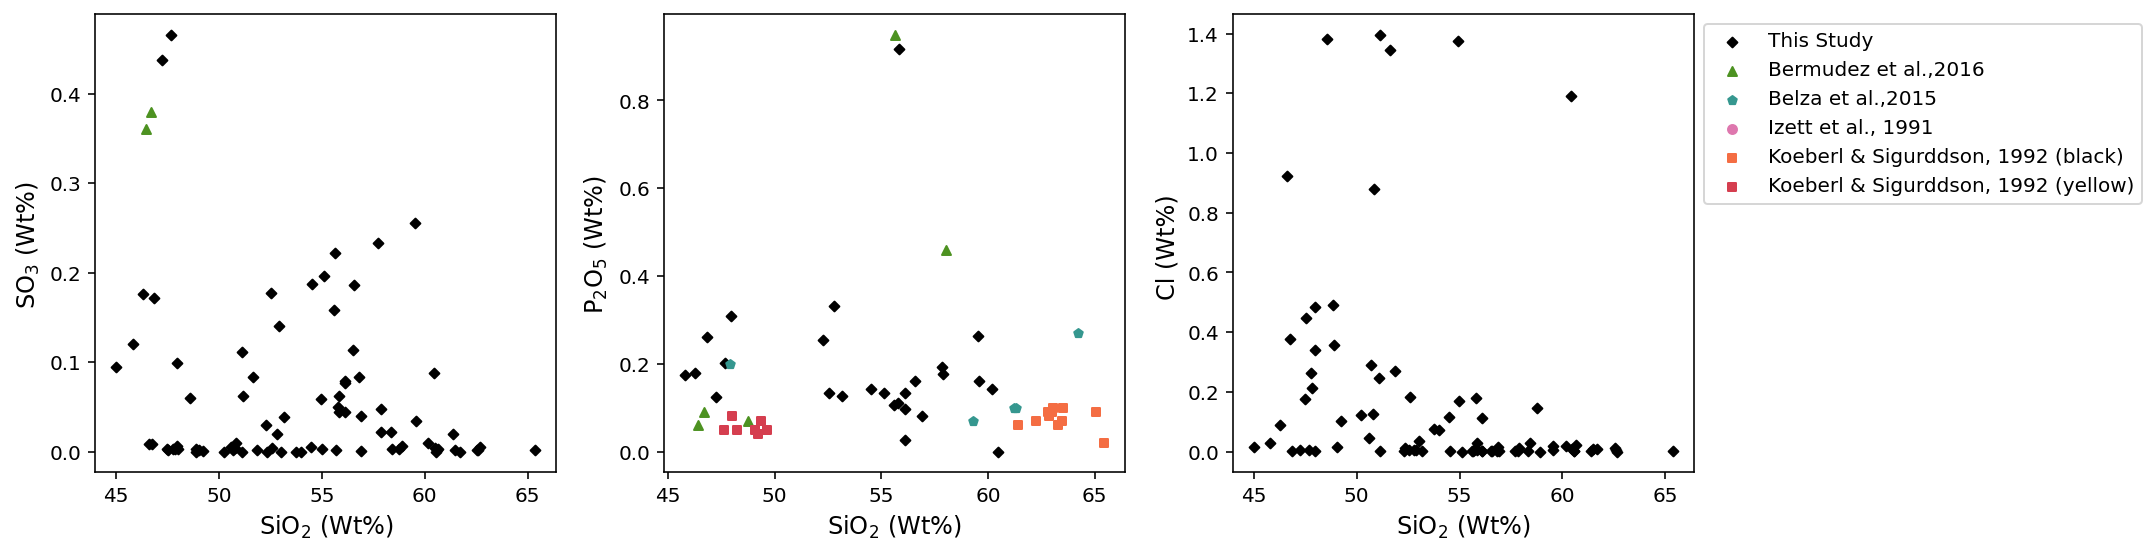

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

i=0
for ax in axs.reshape(-1): 
    ax.scatter(fin_data_sample_mean['SiO2'].tolist(), fin_data_sample_mean[volatiles[i]].tolist(),color = 'black', 
               s=12,label='This Study')
    ax.scatter(bermudez['SiO2'].tolist(), bermudez[volatiles[i]].tolist(), marker= '^',s=20,color = '#4d9221',
               label='Bermudez et al.,2016')
    ax.scatter(belza['SiO2'].tolist(), belza[volatiles[i]].tolist(), marker= 'p',s=20,color = '#35978f',
               label='Belza et al.,2015')
    ax.scatter(izett['SiO2'].tolist(), izett[volatiles[i]].tolist(), marker= 'o',s=20,color = '#de77ae',
               label='Izett et al., 1991')
    ax.scatter(kbrl_blck['SiO2'].tolist(), kbrl_blck[volatiles[i]].tolist(), marker= 's',s=20,color = '#f46d43',
               label='Koeberl & Sigurddson, 1992 (black)')
    ax.scatter(kbrl_ylw['SiO2'].tolist(), kbrl_ylw[volatiles[i]].tolist(), marker= 's',s=20,color = '#d53e4f',
               label='Koeberl & Sigurddson, 1992 (yellow)')
    ax.set_ylabel(volatiles_labels[i]+ ' (Wt%) ')
    ax.set_xlabel('SiO$_2$ (Wt%)')

    i = i + 1


print('Volatiles, mean tektites in study')
fig.tight_layout()
plt.legend(frameon=True)
#plt.savefig('harker_volatiles_navg.png',dpi=300, bbox_inches='tight')
plt.show()

**Non-Mean Data**

In [21]:
features_labels = ['K$_2$O','CaO','TiO$_2$','Al$_2$O$_3$','Na$_2$O','MgO','FeO','MnO']

Major oxides, tektites in study (not mean data)


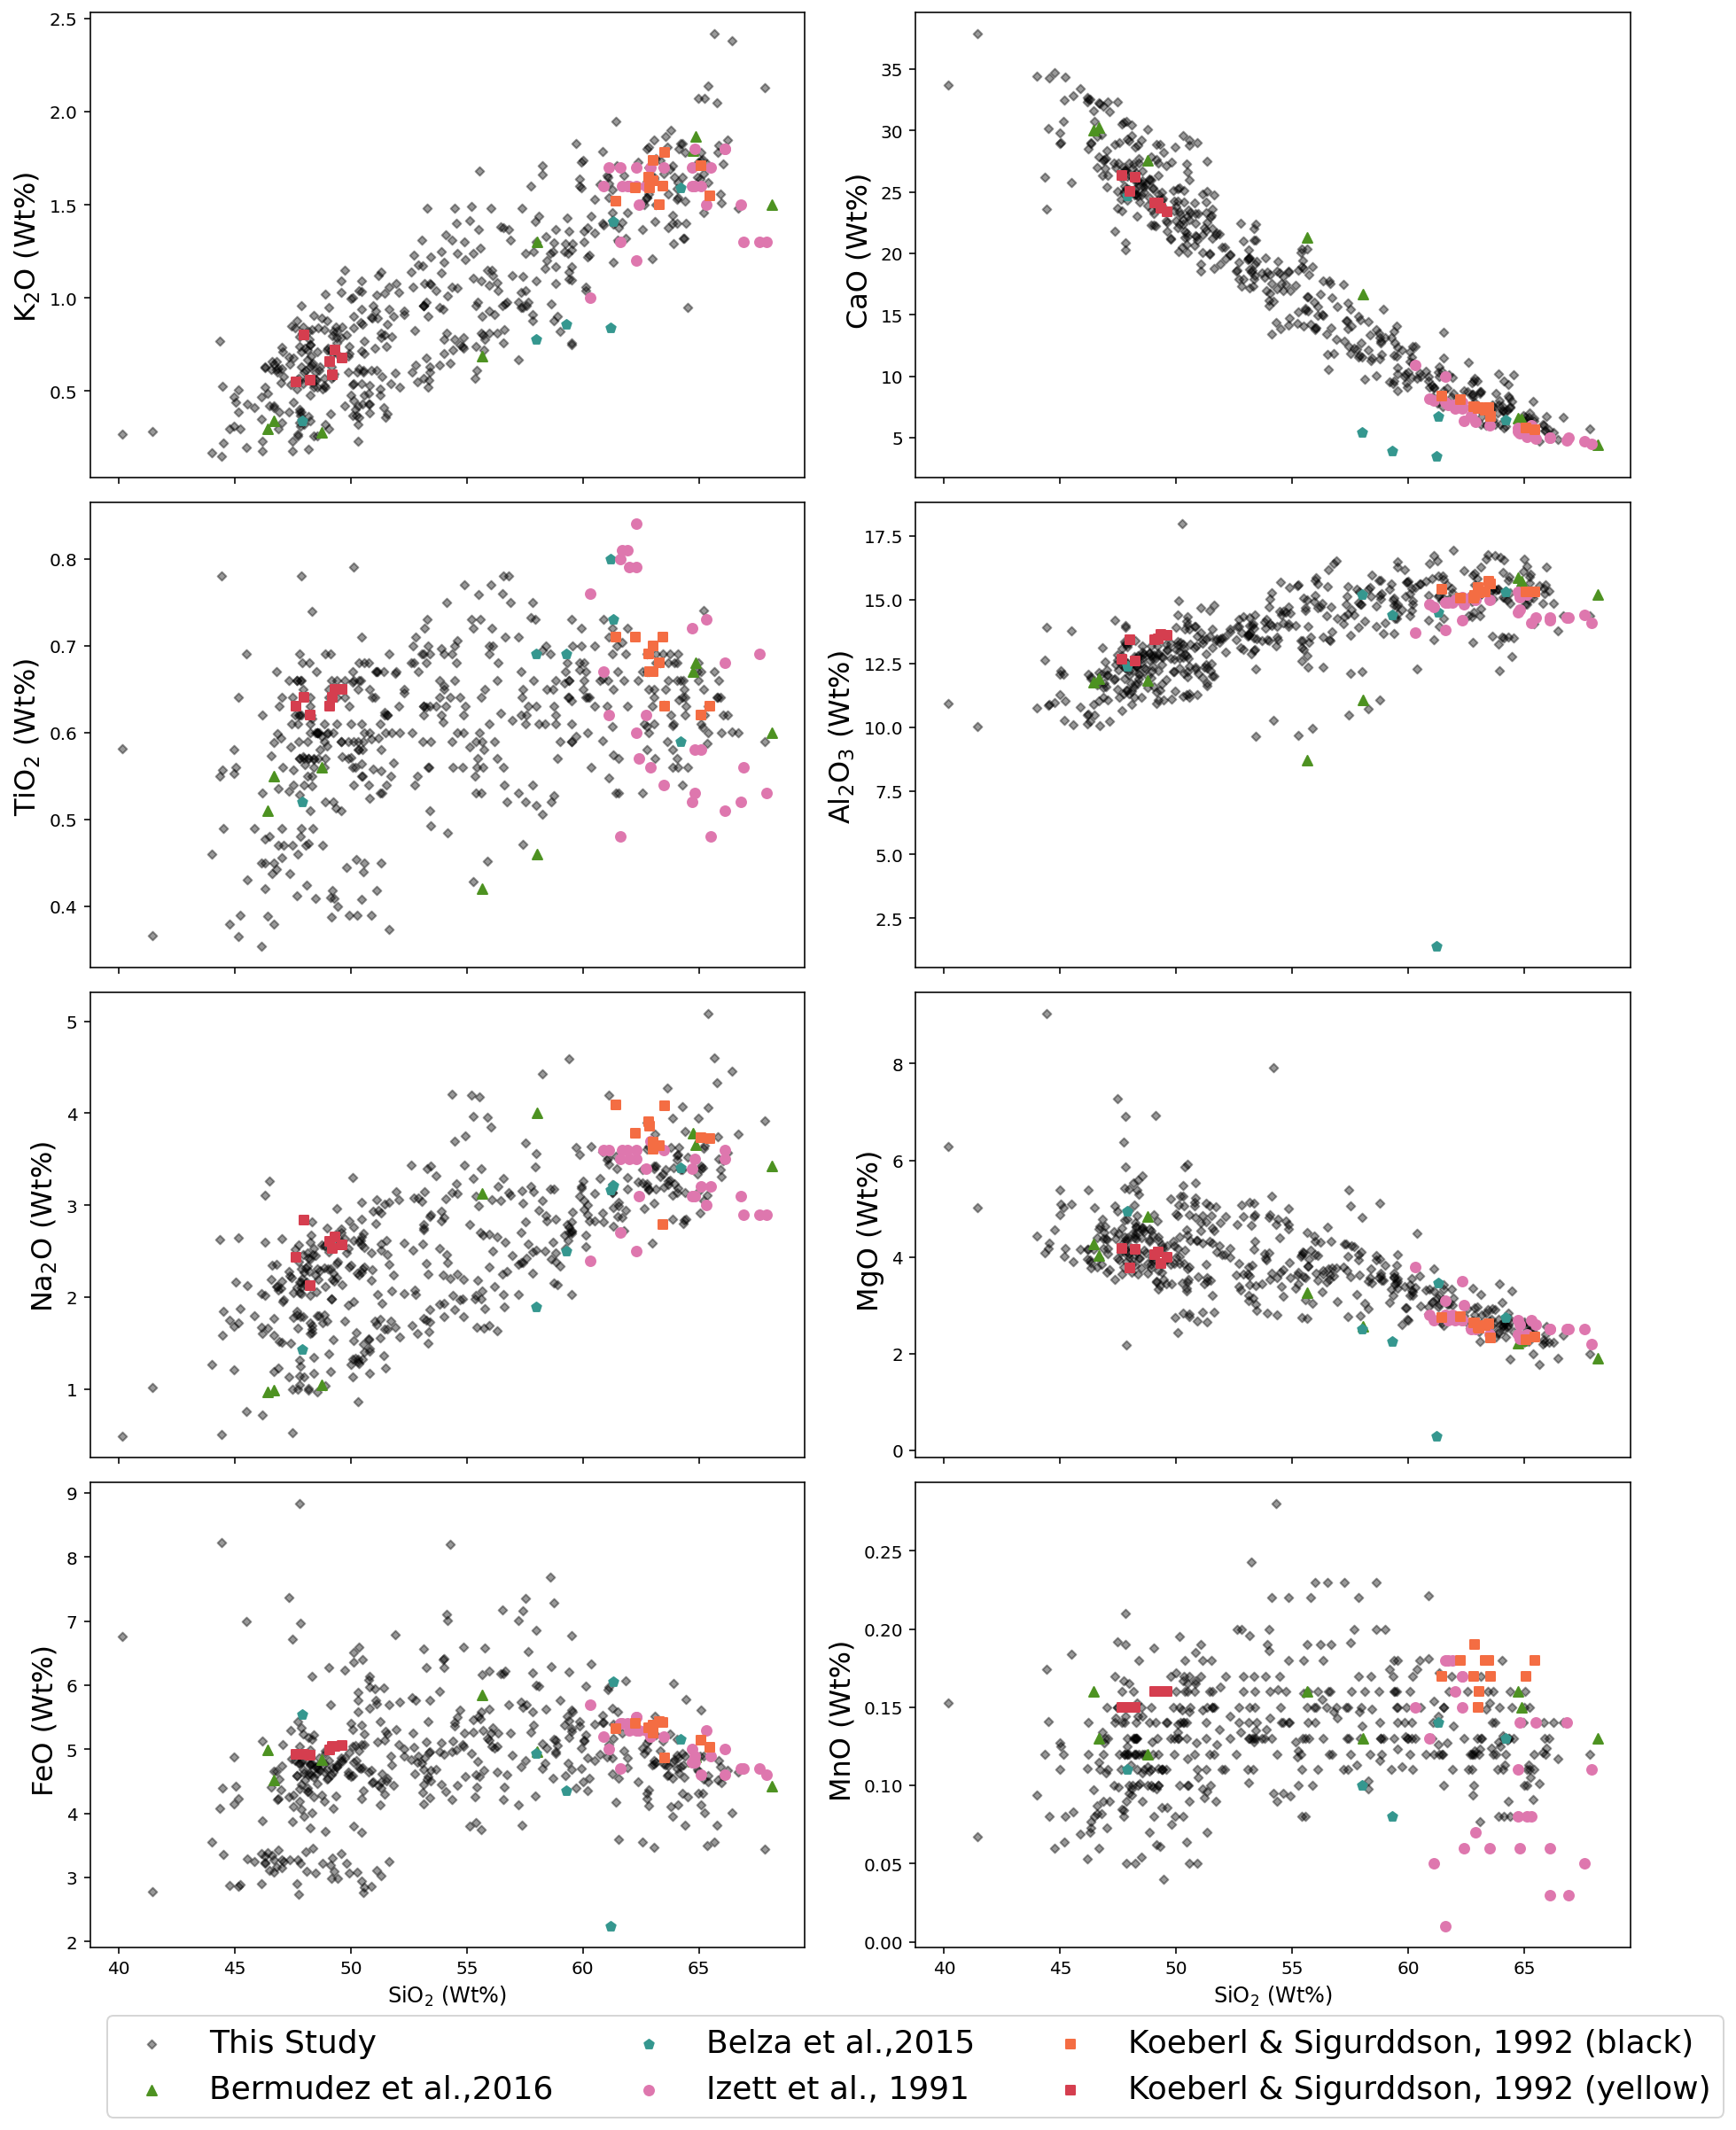

In [37]:
nrow = 4; ncol = 2;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, sharex=True, figsize=(13, 16))

i=0
for ax in axs.reshape(-1): 
    ax.scatter(fin_data['SiO2'].tolist(), fin_data[features[i]].tolist(),color = 'black', 
               s=12,alpha=0.4,label='This Study')
    ax.scatter(bermudez['SiO2'].tolist(), bermudez[features[i]].tolist(), marker= '^',s=30,color = '#4d9221',
               label='Bermudez et al.,2016')
    ax.scatter(belza['SiO2'].tolist(), belza[features[i]].tolist(), marker= 'p',s=30,color = '#35978f',
               label='Belza et al.,2015')
    ax.scatter(izett['SiO2'].tolist(), izett[features[i]].tolist(), marker= 'o',s=30,color = '#de77ae',
               label='Izett et al., 1991')
    ax.scatter(kbrl_blck['SiO2'].tolist(), kbrl_blck[features[i]].tolist(), marker= 's',s=30,color = '#f46d43',
               label='Koeberl & Sigurddson, 1992 (black)')
    ax.scatter(kbrl_ylw['SiO2'].tolist(), kbrl_ylw[features[i]].tolist(), marker= 's',s=30,color = '#d53e4f',
               label='Koeberl & Sigurddson, 1992 (yellow)')
    ax.set_ylabel(features_labels[i]+ ' (Wt%) ', fontsize = 16)

    i = i + 1

print('Major oxides, tektites in study (not mean data)')
plt.setp(axs[-1, :], xlabel='SiO$_2$ (Wt%)')
plt.tight_layout()
ax.legend(loc = 'lower center', bbox_to_anchor=(0, -0.4),frameon=True, fontsize= 'large', ncol=3, prop={'size': 18})
plt.savefig('harker_oxides_navg.png',dpi=300, format='png',
           bbox_inches='tight')

plt.show()

Volatiles, tektites in study (not mean data)


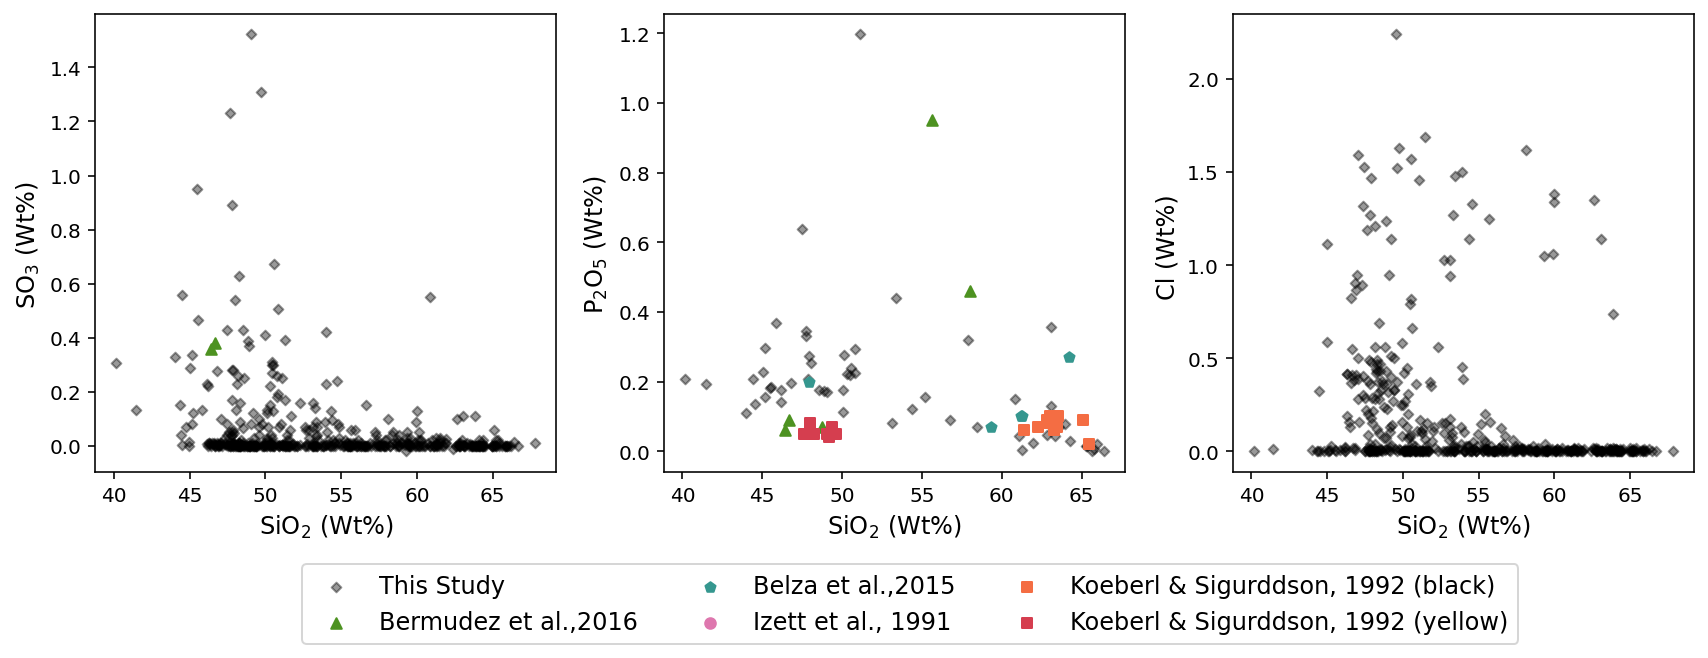

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

i=0
for ax in axs.reshape(-1): 
    ax.scatter(fin_data['SiO2'].tolist(), fin_data[volatiles[i]].tolist(),color = 'black', 
               s=12,alpha=0.4,label='This Study')
    ax.scatter(bermudez['SiO2'].tolist(), bermudez[volatiles[i]].tolist(), marker= '^',s=28,color = '#4d9221',
               label='Bermudez et al.,2016')
    ax.scatter(belza['SiO2'].tolist(), belza[volatiles[i]].tolist(), marker= 'p',s=28,color = '#35978f',
               label='Belza et al.,2015')
    ax.scatter(izett['SiO2'].tolist(), izett[volatiles[i]].tolist(), marker= 'o',s=28,color = '#de77ae',
               label='Izett et al., 1991')
    ax.scatter(kbrl_blck['SiO2'].tolist(), kbrl_blck[volatiles[i]].tolist(), marker= 's',s=28,color = '#f46d43',
               label='Koeberl & Sigurddson, 1992 (black)')
    ax.scatter(kbrl_ylw['SiO2'].tolist(), kbrl_ylw[volatiles[i]].tolist(), marker= 's',s=28,color = '#d53e4f',
               label='Koeberl & Sigurddson, 1992 (yellow)')
    ax.set_ylabel(volatiles_labels[i]+ ' (Wt%) ')
    ax.set_xlabel('SiO$_2$ (Wt%)')

    i = i + 1


print('Volatiles, tektites in study (not mean data)')
fig.tight_layout()
ax.legend(loc = 'lower center', bbox_to_anchor=(-0.7, -0.4),frameon=True, ncol=3, prop={'size': 12})
#plt.savefig('harker_volatiles_SPCl.png',dpi=300,
 #          bbox_inches='tight')
plt.show()

**Figure 5:** SO33 vs CaO, P2O5 vs. CaO, Cl vs Na2O 

Volatiles vs. wieght oxides, tektites in study (not mean data)


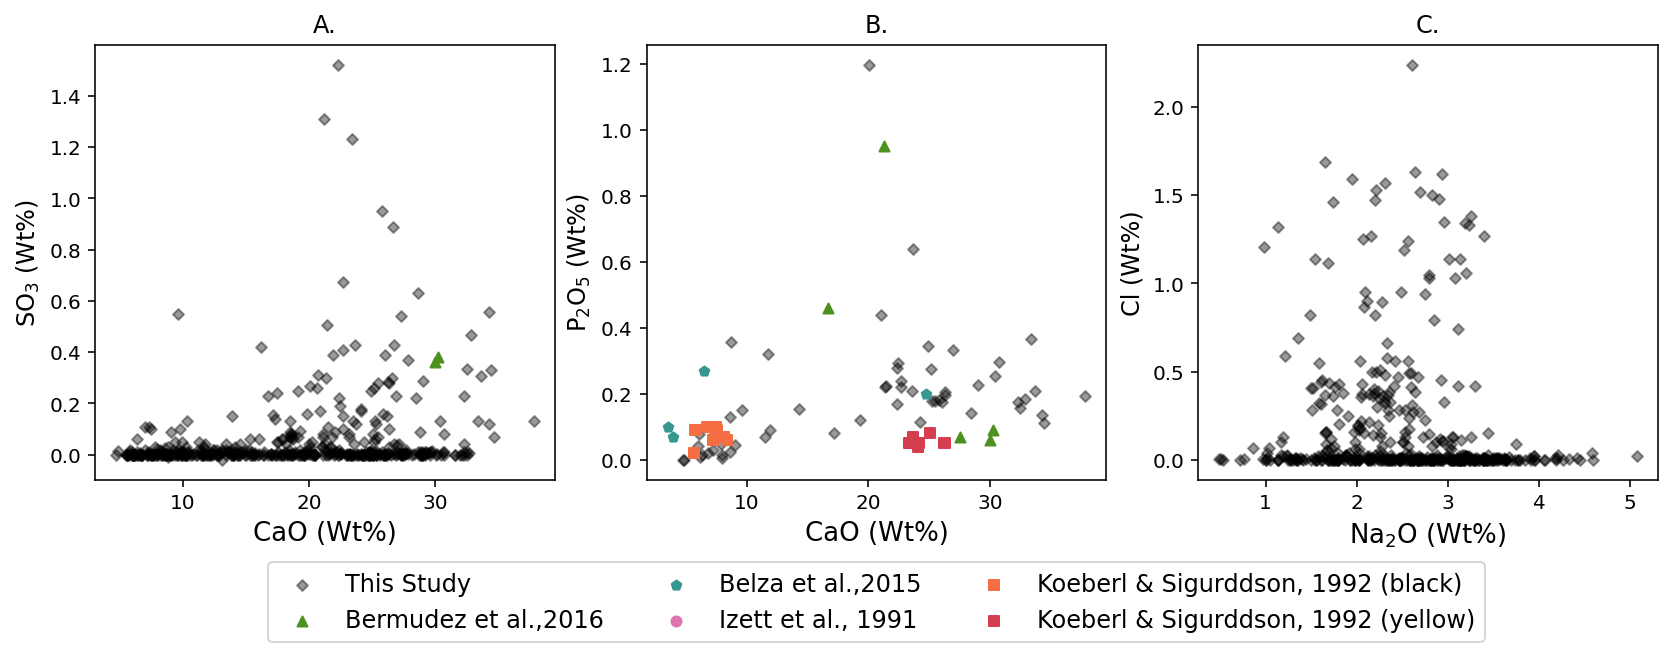

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 4),squeeze=False)


axs[0,0].scatter(fin_data['CaO'],fin_data[volatiles[0]],color = 'black', s=15,alpha=0.4)
axs[0,0].scatter(bermudez['CaO'],bermudez[volatiles[0]],marker= '^', s=25,color = '#4d9221', 
       label='Bermudez et al.,2016')
axs[0,0].set_ylabel('SO$_3$ (Wt%)',fontsize=12)
axs[0,0].set_xlabel('CaO (Wt%)',fontsize=13)
axs[0,0].set_title('A.')

axs[0,1].scatter(fin_data['CaO'],fin_data[volatiles[1]],color = 'black', s=15,alpha=0.4,
        label='This Study')
axs[0,1].scatter(bermudez['CaO'],bermudez[volatiles[1]],marker= '^', s=25,color = '#4d9221',
        label='Bermudez et al.,2016')
axs[0,1].scatter(belza['CaO'],belza[volatiles[1]],marker= 'p',s=25,color = '#35978f', 
        label='Belza et al.,2015')
axs[0,1].scatter(izett['CaO'],izett[volatiles[1]],marker= 'o',s=25,color = '#de77ae',
        label='Izett et al., 1991')
axs[0,1].scatter(kbrl_blck['CaO'],kbrl_blck[volatiles[1]],marker= 's',s=25,color = '#f46d43',
        label='Koeberl & Sigurddson, 1992 (black)')
axs[0,1].scatter(kbrl_ylw['CaO'],kbrl_ylw[volatiles[1]],marker= 's',s=25,color = '#d53e4f',
        label='Koeberl & Sigurddson, 1992 (yellow)')
axs[0,1].set_ylabel('P$_2$O$_5$ (Wt%)',fontsize=12)
axs[0,1].set_xlabel('CaO (Wt%)',fontsize=13)
axs[0,1].set_title('B.')

axs[0,2].scatter(fin_data['Na2O'],fin_data[volatiles[2]],color = 'black', s=15,alpha=0.4,
        label='This Study')
axs[0,2].scatter(bermudez['Na2O'],bermudez[volatiles[2]],marker= '^', s=25,color = '#4d9221',
        label='Bermudez et al.,2016')
axs[0,2].scatter(belza['Na2O'],belza[volatiles[2]],marker= 'p',s=25,color = '#35978f', 
        label='Belza et al.,2015')
axs[0,2].scatter(izett['Na2O'],izett[volatiles[2]],marker= 'o',s=25,color = '#de77ae',
        label='Izett et al., 1991')
axs[0,2].scatter(kbrl_blck['Na2O'],kbrl_blck[volatiles[2]],marker= 's',s=25,color = '#f46d43',
        label='Koeberl & Sigurddson, 1992 (black)')
axs[0,2].scatter(kbrl_ylw['Na2O'],kbrl_ylw[volatiles[2]],marker= 's',s=25,color = '#d53e4f',
        label='Koeberl & Sigurddson, 1992 (yellow)')
axs[0,2].set_ylabel('Cl (Wt%)',fontsize=12)
axs[0,2].set_xlabel('Na$_2$O (Wt%)',fontsize=13)
axs[0,2].set_title('C.')

print('Volatiles vs. wieght oxides, tektites in study (not mean data)')
#fig.tight_layout()
axs[0,2].legend(loc = 'lower center', bbox_to_anchor=(-0.7, -0.4),frameon=True,fontsize= 'large', ncol=3, prop={'size': 12})
plt.savefig('volatiles_diagrams_navg.png',dpi=300,
           bbox_inches='tight')
plt.show()